In [1]:
import numpy as np
from keras.preprocessing import image
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from pathlib import Path
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from skimage.io import imread
print("Files imported successfully")
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30*30 + 1)
import seaborn as sns
import cv2
import tensorflow as tf
from tqdm import tqdm
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
import glob
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk(r'.\AMLS-2021_dataset\dataset\smoothen_image'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Files imported successfully
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0000.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0001.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0002.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0003.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0004.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0005.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0006.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0007.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0008.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0009.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0010.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0011.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0012.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0013.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0014.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_0015.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\I

.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1978.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1979.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1980.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1981.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1982.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1983.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1984.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1985.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1986.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1987.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1988.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1989.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1990.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1991.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1992.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1993.jpg
.\AMLS-2021_dataset\dataset\smoothen_image\IMAGE_1994.jpg
.\AMLS-2021_da

# Import image and reshape into 128*128

In [2]:
image_size = 128
def importjpg(jpgfile,X):
    #img = cv2.imread(jpgfile,0)
    img = cv2.imread(jpgfile,0)
    img = cv2.resize(img,(image_size, image_size))
    img = np. array(img)
    img = img / 255
    #img = img.flatten()
    X.append(img)


    
# X dataset
X = []
for jpgfile in glob.glob(r"./AMLS-2021_dataset/dataset/smoothen_image/*.jpg"):
    importjpg(jpgfile,X)
X = np. array(X)
print(X.shape)

# flatten X dataset
X_flatten = []
for img in X:
    img = img.flatten()
    X_flatten.append(img)
X_flatten = np. array(X_flatten)  
print(X_flatten.shape)


(3000, 128, 128)
(3000, 16384)


# Import csv label

In [3]:
data_csv = pd.read_csv (r'./AMLS-2021_dataset/dataset/label.csv')
print (data_csv)

Y_binary = pd.DataFrame(data_csv, columns= ['tumor_or_not'])
Y_binary = np.array(Y_binary)
Y_binary = Y_binary.flatten()
print(Y_binary)

Y_multi = pd.DataFrame(data_csv, columns= ['label'])
Y_multi = np.array(Y_multi)
Y_multi = Y_multi.flatten()
print(Y_multi)

           file_name       label  tumor_or_not  Tumor_type
0     IMAGE_0000.jpg  meningioma             1           1
1     IMAGE_0001.jpg          no             0           0
2     IMAGE_0002.jpg  meningioma             1           1
3     IMAGE_0003.jpg      glioma             1           2
4     IMAGE_0004.jpg  meningioma             1           1
...              ...         ...           ...         ...
2995  IMAGE_2995.jpg          no             0           0
2996  IMAGE_2996.jpg  meningioma             1           1
2997  IMAGE_2997.jpg      glioma             1           2
2998  IMAGE_2998.jpg      glioma             1           2
2999  IMAGE_2999.jpg   pituitary             1           3

[3000 rows x 4 columns]
[1 0 1 ... 1 1 1]
['meningioma' 'no' 'meningioma' ... 'glioma' 'glioma' 'pituitary']


# Split the data

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_binary, random_state=101, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, random_state=101, test_size=0.5)
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))

num_val = X_val.shape[0]
num_test = X_test.shape[0]
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
print("after flatten:")
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(Y_train.shape))
print("y_test: "+str(Y_test.shape))
print("y_val: "+str(Y_val.shape))

X_train: (2400, 128, 128)
X_test: (300, 128, 128)
X_val: (300, 128, 128)
after flatten:
X_train: (2400, 16384)
X_test: (300, 16384)
X_val: (300, 16384)
y_train: (2400,)
y_test: (300,)
y_val: (300,)


# Find optimum k

Using SKLEARN & validation dataset


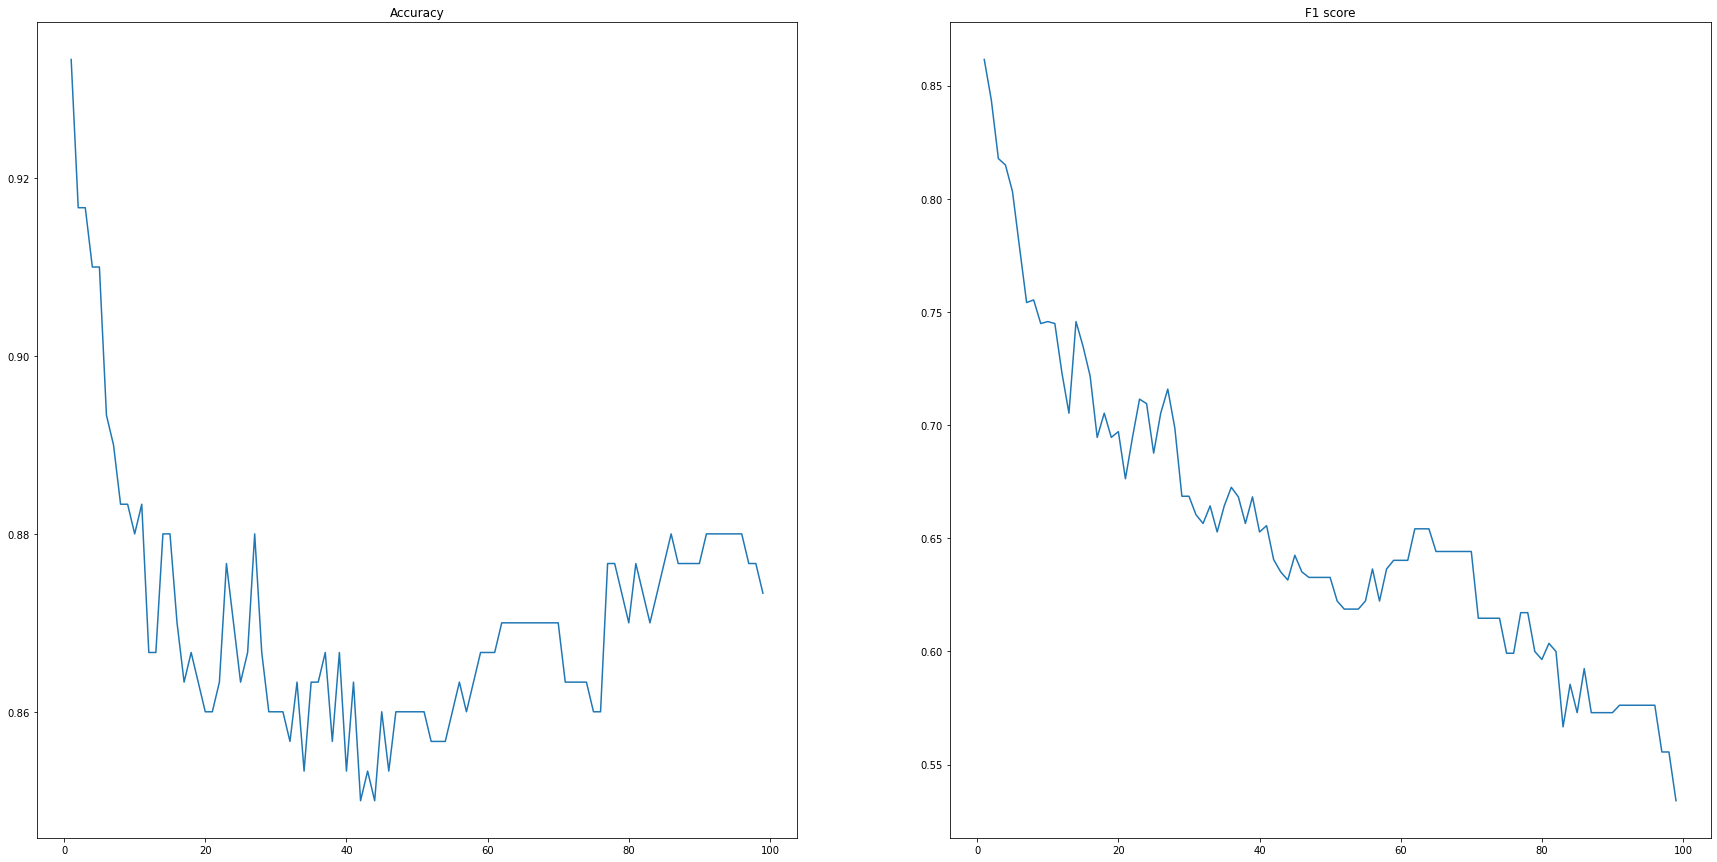

max acc at k=1 acc of 0.9333333333333333
max acc at k=1 f1 of 0.8615725359911407


In [5]:
print("Using SKLEARN & validation dataset")
KNN_valid_x = []
KNN_valid_y_acc = []
KNN_valid_y_f1 = []
index_acc=0
index_f1=0
acc=0
f1=0


for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    Y_pred_val = neigh.predict(X_val)
    KNN_valid_y_f1.append(f1_score(Y_val, Y_pred_val, average='macro'))
    KNN_valid_y_acc.append(neigh.score(X_val, Y_val))
    if KNN_valid_y_acc[k-1]>acc:
        acc=KNN_valid_y_acc[k-1]
        index_acc=k-1
    if KNN_valid_y_f1[k-1]>f1:
        f1=KNN_valid_y_f1[k-1]
        index_f1=k-1        
    
    KNN_valid_x.append(k)

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Accuracy')
plt.plot(KNN_valid_x, KNN_valid_y_acc)
ax1 = fig.add_subplot(1,2,2) 
ax1.set_title('F1 score')
plt.plot(KNN_valid_x, KNN_valid_y_f1)
plt.show()

print("max acc at k="+str(index_acc+1)+" acc of "+str(acc))
print("max acc at k="+str(index_f1+1)+" f1 of "+str(f1))


## Using K-fold to find optimum k

Using SKLEARN & K-fold


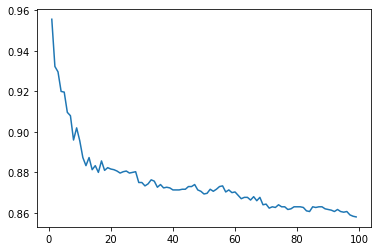

max acc at k=1 acc of 0.9556666666666667


In [6]:
print("Using SKLEARN & K-fold")
KNN_valid_x_cross = []
KNN_valid_y_acc_cross = []
index_acc_cross=0
acc_cross=0


for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
        
    KNN_valid_y_acc_cross.append(cross_val_score(neigh, X_flatten, Y_binary, cv=10).mean())
    if KNN_valid_y_acc_cross[k-1]>acc_cross:
        acc_cross=KNN_valid_y_acc_cross[k-1]
        index_acc_cross=k-1 
    
    KNN_valid_x_cross.append(k)

plt.plot(KNN_valid_x_cross, KNN_valid_y_acc_cross)
plt.show()

print("max acc at k="+str(index_acc_cross+1)+" acc of "+str(acc_cross))



We can see that the optimum k=1, so we train the data with KNN(k=1). And then we evaluate the accuracy on test data

Test Accuracy: 0.97


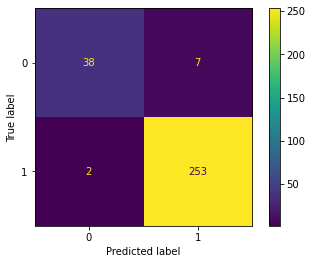

In [7]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, Y_train)
print("Test Accuracy: "+str(neigh.score(X_test, Y_test)))
plot_confusion_matrix(neigh, X_test, Y_test)  
plt.show()

# Using Trail dataset（from AMLS-2021_test）

In [8]:
# X dataset
X_trail = []
for jpgfile in glob.glob(r".\AMLS-2021_test\test\image\*.jpg"):
    importjpg(jpgfile,X_trail)
X_trail = np. array(X_trail)

X_trail = np.reshape(X_trail, (X_trail.shape[0], -1))
print(X_trail.shape)

(200, 16384)


In [9]:
data_csv_trail = pd.read_csv (r'.\AMLS-2021_test\test\label.csv')
#print (data_csv_trail)
Y_binary_trail = pd.DataFrame(data_csv_trail, columns= ['tumor_or_not'])
Y_binary_trail = np.array(Y_binary_trail)
Y_binary_trail = Y_binary_trail.flatten()
print(Y_binary_trail.shape)


(200,)


Test Accuracy: 0.965


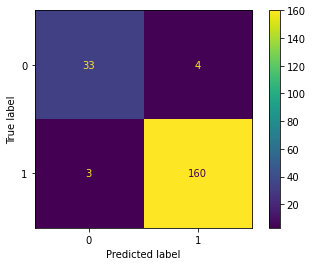

In [10]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, Y_train)
print("Test Accuracy: "+str(neigh.score(X_trail, Y_binary_trail)))
plot_confusion_matrix(neigh, X_trail, Y_binary_trail)  
plt.show()

# Multi classification

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_multi, random_state=101, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, random_state=101, test_size=0.5)
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))

num_val = X_val.shape[0]
num_test = X_test.shape[0]
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
print("after flatten:")
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(Y_train.shape))
print("y_test: "+str(Y_test.shape))
print("y_val: "+str(Y_val.shape))

X_train: (2400, 128, 128)
X_test: (300, 128, 128)
X_val: (300, 128, 128)
after flatten:
X_train: (2400, 16384)
X_test: (300, 16384)
X_val: (300, 16384)
y_train: (2400,)
y_test: (300,)
y_val: (300,)


# Finding optimum k

Using SKLEARN & validation dataset


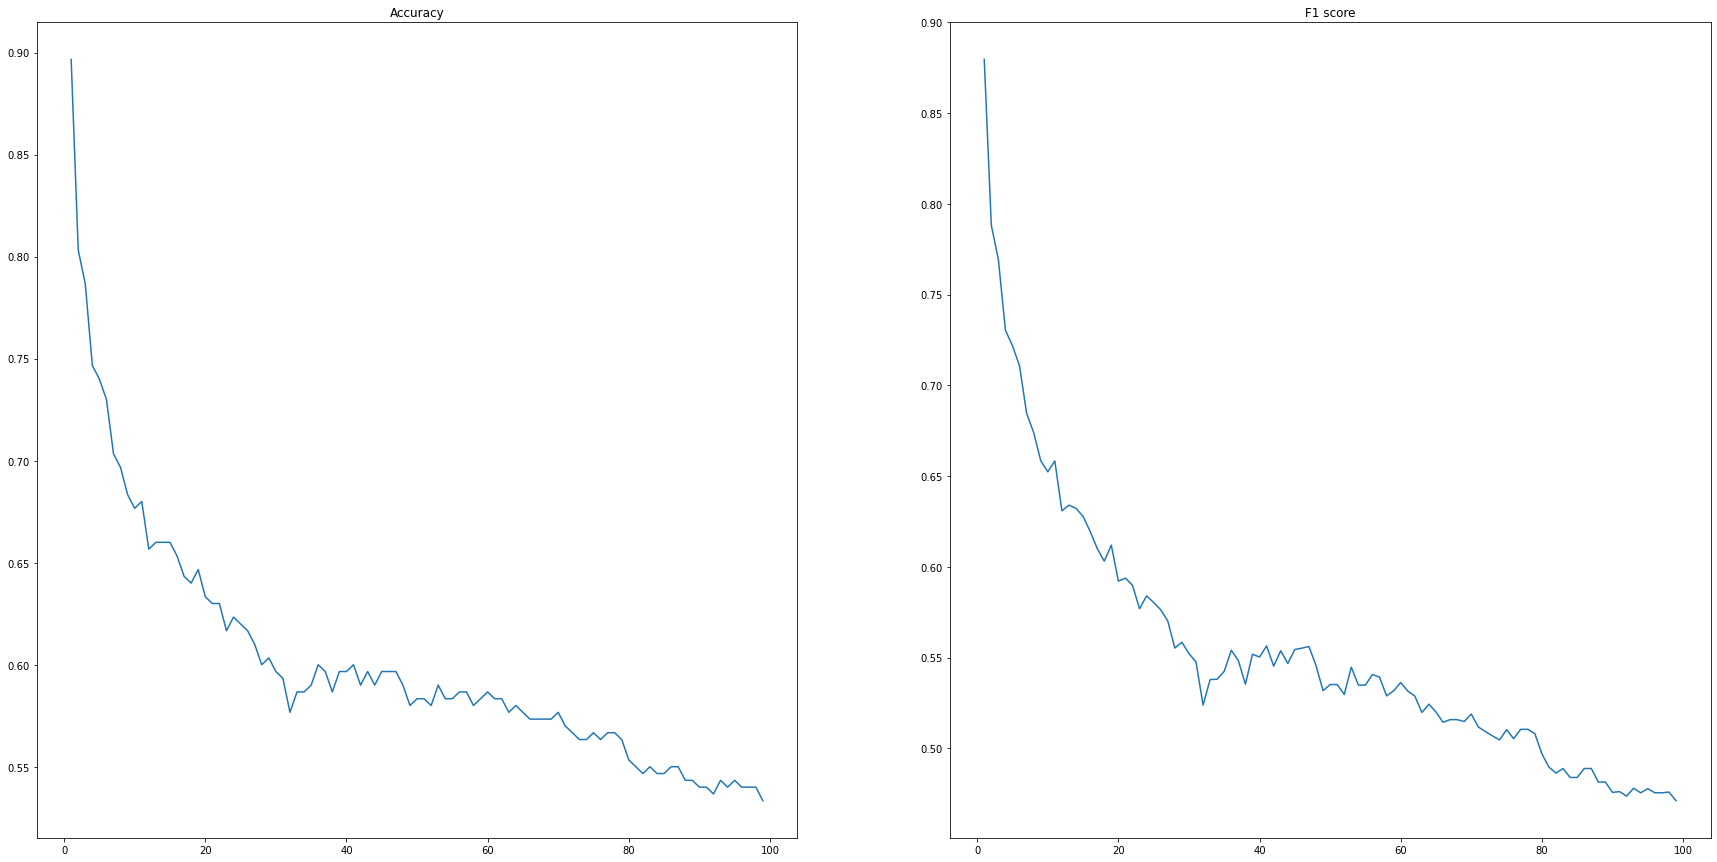

max acc at k=1 acc of 0.8966666666666666
max f1 at k=1 f1 of 0.8796152292412243


In [12]:
print("Using SKLEARN & validation dataset")
KNN_valid_x = []
KNN_valid_y_acc = []
KNN_valid_y_f1 = []
index_acc=0
index_f1=0
acc=0
f1=0


for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    Y_pred_val = neigh.predict(X_val)
    KNN_valid_y_f1.append(f1_score(Y_val, Y_pred_val, average='macro'))
    KNN_valid_y_acc.append(neigh.score(X_val, Y_val))
    if KNN_valid_y_acc[k-1]>acc:
        acc=KNN_valid_y_acc[k-1]
        index_acc=k-1
    if KNN_valid_y_f1[k-1]>f1:
        f1=KNN_valid_y_f1[k-1]
        index_f1=k-1        
    
    KNN_valid_x.append(k)

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Accuracy')
plt.plot(KNN_valid_x, KNN_valid_y_acc)
ax1 = fig.add_subplot(1,2,2) 
ax1.set_title('F1 score')
plt.plot(KNN_valid_x, KNN_valid_y_f1)
plt.show()

print("max acc at k="+str(index_acc+1)+" acc of "+str(acc))
print("max f1 at k="+str(index_f1+1)+" f1 of "+str(f1))


## Finding optimum k using K-fold

Using SKLEARN & K-fold


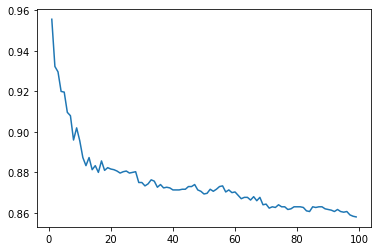

max acc at k=1 acc of 0.9556666666666667


In [13]:
print("Using SKLEARN & K-fold")
KNN_valid_x_cross = []
KNN_valid_y_acc_cross = []
index_acc_cross=0
acc_cross=0


for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
        
    KNN_valid_y_acc_cross.append(cross_val_score(neigh, X_flatten, Y_binary, cv=10).mean())
    if KNN_valid_y_acc_cross[k-1]>acc_cross:
        acc_cross=KNN_valid_y_acc_cross[k-1]
        index_acc_cross=k-1 
    
    KNN_valid_x_cross.append(k)

plt.plot(KNN_valid_x_cross, KNN_valid_y_acc_cross)
plt.show()

print("max acc at k="+str(index_acc_cross+1)+" acc of "+str(acc_cross))



# Use x_test to evaluate the accuarcy

Test Accuracy: 0.91


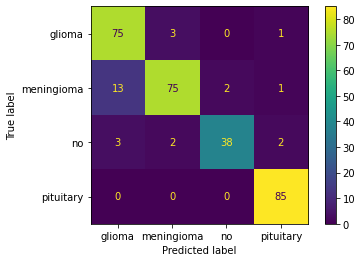

In [14]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, Y_train)
print("Test Accuracy: "+str(neigh.score(X_test, Y_test)))
plot_confusion_matrix(neigh, X_test, Y_test)  
plt.show()

# Using Trail dataset（from AMLS-2021_test）

In [15]:
# X dataset
X_trail = []
for jpgfile in glob.glob(r".\AMLS-2021_test\test\image\*.jpg"):
    importjpg(jpgfile,X_trail)
X_trail = np. array(X_trail)

X_trail = np.reshape(X_trail, (X_trail.shape[0], -1))
print(X_trail.shape)

(200, 16384)


In [16]:
data_csv_trail = pd.read_csv (r'.\AMLS-2021_test\test\label.csv')
#print (data_csv_trail)
Y_multi_trail = pd.DataFrame(data_csv_trail, columns= ['label'])
Y_multi_trail = np.array(Y_multi_trail)
Y_multi_trail = Y_multi_trail.flatten()
print(Y_multi_trail.shape)


(200,)


Test Accuracy: 0.875


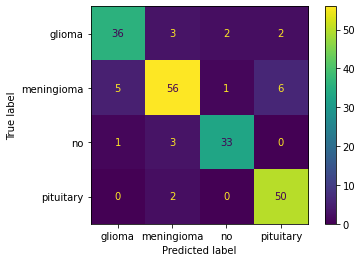

In [17]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, Y_train)
print("Test Accuracy: "+str(neigh.score(X_trail, Y_multi_trail)))
plot_confusion_matrix(neigh, X_trail, Y_multi_trail)  
plt.show()

# Using KNN with PCA

In [18]:
image_size = 128
def importjpg(jpgfile,X):
    #img = cv2.imread(jpgfile,0)
    img = cv2.imread(jpgfile,0)
    img = cv2.resize(img,(image_size, image_size))
    img = np. array(img)
    img = img / 255
    #img = img.flatten()
    X.append(img)


    
# X dataset
X = []
for jpgfile in glob.glob(r"./AMLS-2021_dataset/dataset/smoothen_image/*.jpg"):
    importjpg(jpgfile,X)
X = np. array(X)


# flatten X dataset
X_flatten = []
for img in X:
    img = img.flatten()
    X_flatten.append(img)
X_flatten = np. array(X_flatten)  

data_csv = pd.read_csv (r'./AMLS-2021_dataset/dataset/label.csv')

Y_binary = pd.DataFrame(data_csv, columns= ['tumor_or_not'])
Y_binary = np.array(Y_binary)
Y_binary = Y_binary.flatten()


Y_multi = pd.DataFrame(data_csv, columns= ['label'])
Y_multi = np.array(Y_multi)
Y_multi = Y_multi.flatten()


X_train, X_test, Y_train, Y_test = train_test_split(X, Y_binary, random_state=101, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, random_state=101, test_size=0.5)


num_val = X_val.shape[0]
num_test = X_test.shape[0]
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))


# Finding the optimum feature number with k=1

Using SKLEARN & validation dataset with KNN kernel


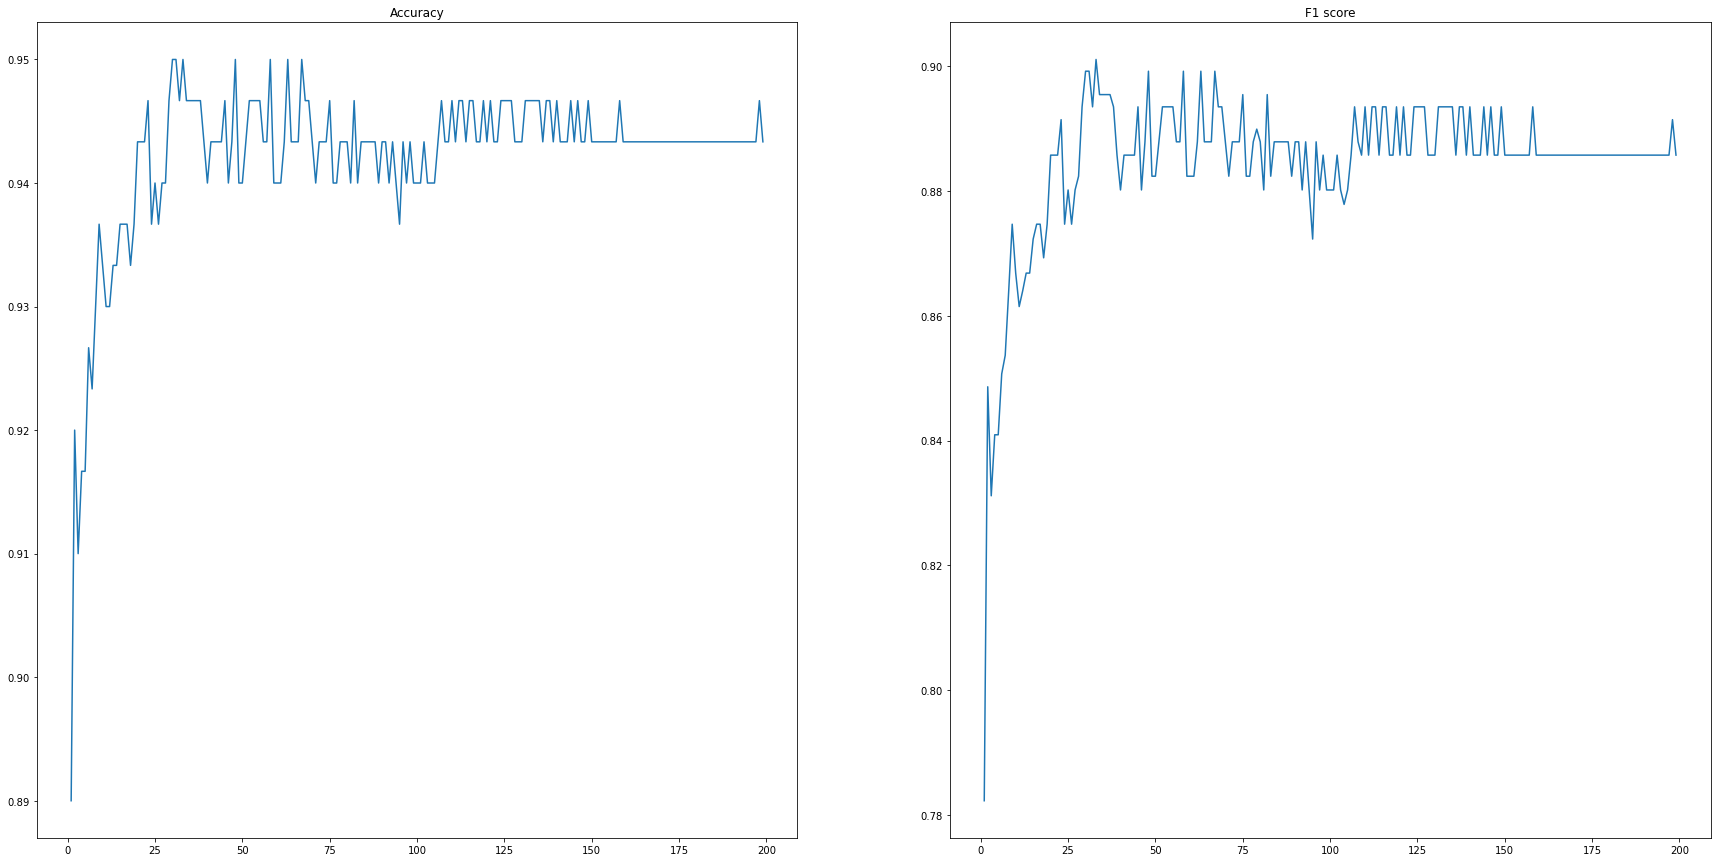

max acc at n=30 acc of 0.95
max acc at n=33 f1 of 0.9010532333604521


In [19]:
print("Using SKLEARN & validation dataset with KNN kernel")
KNN_valid_x = []
KNN_valid_y_acc = []
KNN_valid_y_f1 = []
index_acc=0
index_f1=0
acc=0
f1=0

for k in range(1, 200):
    pca = PCA(k)
    X_train_PCA = pca.fit_transform(X_train)
    X_val_PCA = pca.transform(X_val)
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train_PCA, Y_train)
    Y_pred_val = neigh.predict(X_val_PCA)
    KNN_valid_y_f1.append(f1_score(Y_val, Y_pred_val, average='macro'))
    KNN_valid_y_acc.append(neigh.score(X_val_PCA, Y_val))
    if KNN_valid_y_acc[k-1]>acc:
        acc=KNN_valid_y_acc[k-1]
        index_acc=k-1
    if KNN_valid_y_f1[k-1]>f1:
        f1=KNN_valid_y_f1[k-1]
        index_f1=k-1        
    
    KNN_valid_x.append(k)

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Accuracy')
plt.plot(KNN_valid_x, KNN_valid_y_acc)
ax1 = fig.add_subplot(1,2,2) 
ax1.set_title('F1 score')
plt.plot(KNN_valid_x, KNN_valid_y_f1)
plt.show()

print("max acc at n="+str(index_acc+1)+" acc of "+str(acc))
print("max acc at n="+str(index_f1+1)+" f1 of "+str(f1))

# Using optimum feature number to train data

(2400, 33)
(300, 33)
Accuracy with Not-Linear SVM considering 31PC: 96.33%


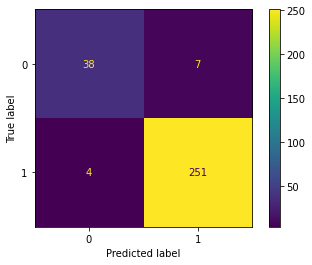

In [20]:
pca = PCA(33)
X_train31D = pca.fit_transform(X_train)
X_val31D = pca.transform(X_val)
X_test31D = pca.transform(X_test)
print(X_train31D.shape)
print(X_val31D.shape)


neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train31D, Y_train)


Y_pred = neigh.predict(X_test31D)
precision = metrics.accuracy_score(Y_pred, Y_test) * 100
print("Accuracy with Not-Linear SVM considering 31PC: {0:.2f}%".format(precision))

plot_confusion_matrix(neigh, X_test31D, Y_test)  
plt.show()

# Test data

In [21]:

# X dataset
X_trail = []
for jpgfile in glob.glob(r".\AMLS-2021_test\test\image\*.jpg"):
    importjpg(jpgfile,X_trail)
X_trail = np. array(X_trail)



X_flatten_trail = []
for img in X_trail:
    img = img.flatten()
    X_flatten_trail.append(img)
X_flatten_trail = np. array(X_flatten_trail)  
print(X_flatten_trail.shape)

#X_trail = np.reshape(X_trail, (X_trail.shape[0], -1))
print(X_flatten_trail.shape)

data_csv_trail = pd.read_csv (r'.\AMLS-2021_test\test\label.csv')
#print (data_csv_trail)

Y_binary_trail = pd.DataFrame(data_csv_trail, columns= ['tumor_or_not'])
Y_binary_trail = np.array(Y_binary_trail)
Y_binary_trail = Y_binary_trail.flatten()
print(Y_binary_trail.shape)



(200, 16384)
(200, 16384)
(200,)


(200, 33)
Accuracy with Not-Linear SVM considering 31PC: 97.00%


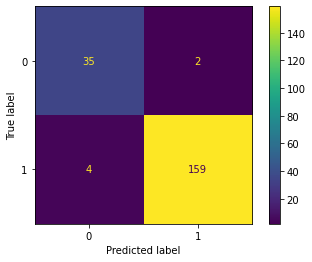

In [22]:
X_trail31D = pca.transform(X_flatten_trail)
print(X_trail31D.shape)

Y_pred = neigh.predict(X_trail31D)
precision = metrics.accuracy_score(Y_pred, Y_binary_trail) * 100
print("Accuracy with Not-Linear SVM considering 31PC: {0:.2f}%".format(precision))

plot_confusion_matrix(neigh, X_trail31D, Y_binary_trail)  
plt.show()

# Multi classification using KNN with PCA

In [23]:
X_t, X_test, Y_train, Y_test = train_test_split(X, Y_multi, random_state=101, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, random_state=101, test_size=0.5)
#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_t])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X_val = scaler.fit_transform([i.flatten() for i in X_val])
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(2400, 16384)
(300, 16384)
(300, 16384)


# Finding the optimum feature number with k=1

Using SKLEARN & validation dataset with KNN kernel


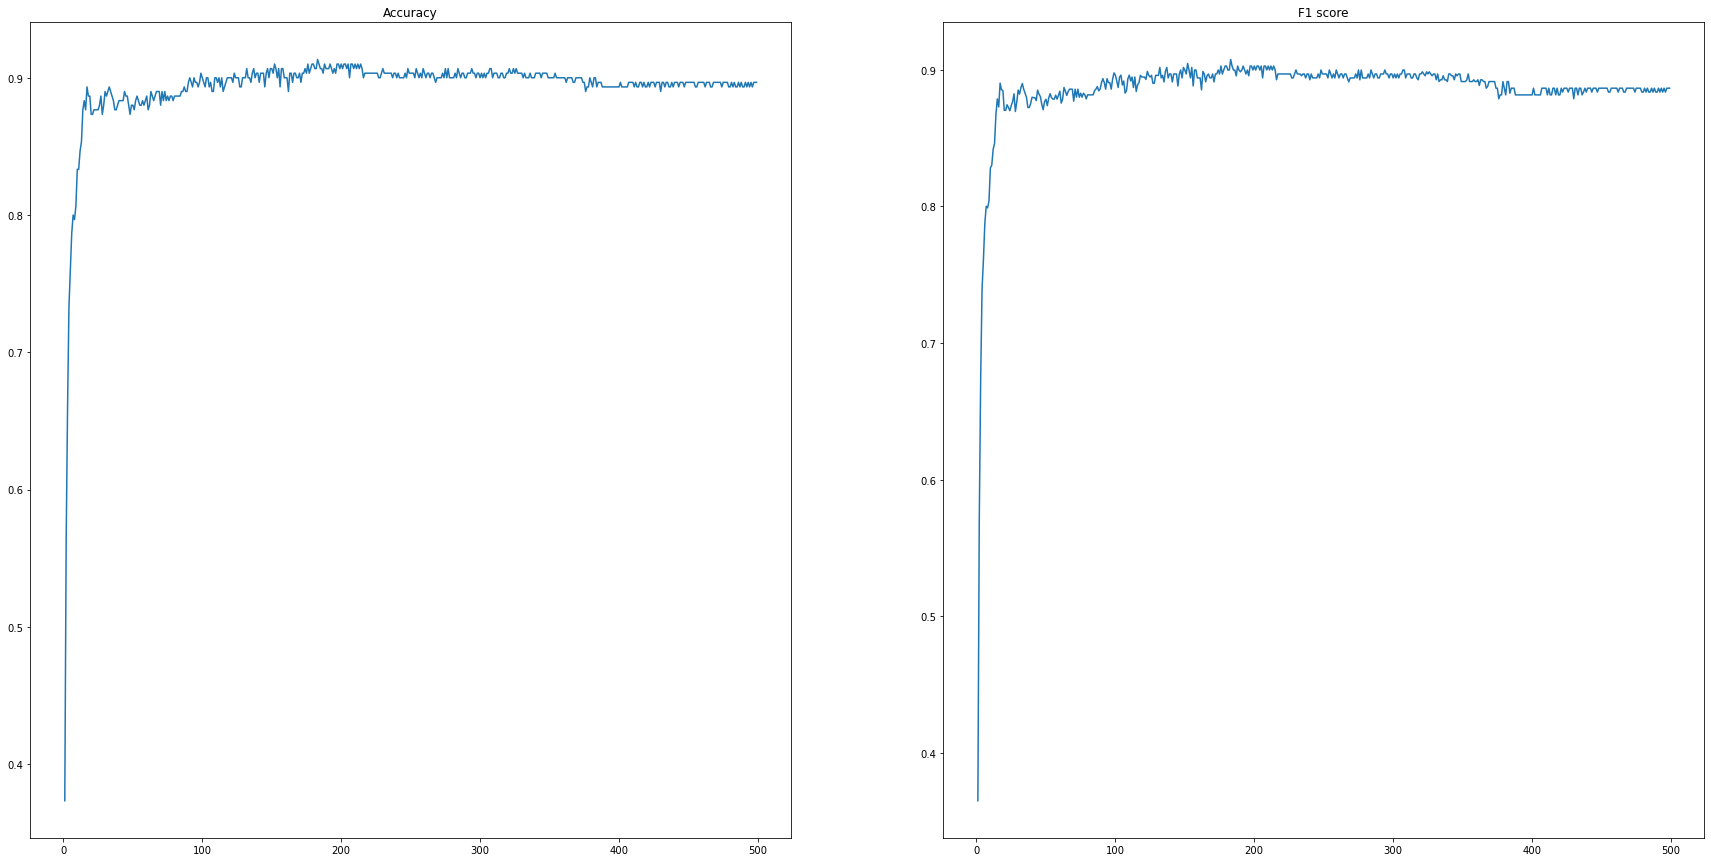

max acc at n=183 acc of 0.9133333333333333
max acc at n=183 f1 of 0.907513201821869


In [24]:
print("Using SKLEARN & validation dataset with KNN kernel")
KNN_valid_x = []
KNN_valid_y_acc = []
KNN_valid_y_f1 = []
index_acc=0
index_f1=0
acc=0
f1=0

for k in range(1, 500):
    pca = PCA(k)
    X_train_PCA = pca.fit_transform(X_train)
    X_val_PCA = pca.transform(X_val)
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train_PCA, Y_train)
    Y_pred_val = neigh.predict(X_val_PCA)
    KNN_valid_y_f1.append(f1_score(Y_val, Y_pred_val, average='macro'))
    KNN_valid_y_acc.append(neigh.score(X_val_PCA, Y_val))
    if KNN_valid_y_acc[k-1]>acc:
        acc=KNN_valid_y_acc[k-1]
        index_acc=k-1
    if KNN_valid_y_f1[k-1]>f1:
        f1=KNN_valid_y_f1[k-1]
        index_f1=k-1        
    
    KNN_valid_x.append(k)

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Accuracy')
plt.plot(KNN_valid_x, KNN_valid_y_acc)
ax1 = fig.add_subplot(1,2,2) 
ax1.set_title('F1 score')
plt.plot(KNN_valid_x, KNN_valid_y_f1)
plt.show()

print("max acc at n="+str(index_acc+1)+" acc of "+str(acc))
print("max acc at n="+str(index_f1+1)+" f1 of "+str(f1))

# Using optimum feature number to train data

(2400, 183)
(300, 183)
Accuracy with Not-Linear SVM considering 183PC: 90.33%


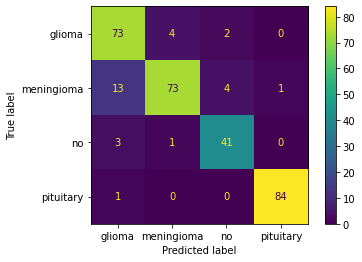

In [25]:
pca = PCA(183)
X_train183D = pca.fit_transform(X_train)
X_val183D = pca.transform(X_val)
X_test183D = pca.transform(X_test)
print(X_train183D.shape)
print(X_val183D.shape)


neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train183D, Y_train)


Y_pred = neigh.predict(X_test183D)
precision = metrics.accuracy_score(Y_pred, Y_test) * 100
print("Accuracy with Not-Linear SVM considering 183PC: {0:.2f}%".format(precision))

plot_confusion_matrix(neigh, X_test183D, Y_test)  
plt.show()

# Using data from AMLS-2021_test

In [29]:

# X dataset
X_trail = []
for jpgfile in glob.glob(r".\AMLS-2021_test\test\image\*.jpg"):
    importjpg(jpgfile,X_trail)
X_trail = np. array(X_trail)



X_flatten_trail = []
for img in X_trail:
    img = img.flatten()
    X_flatten_trail.append(img)
X_flatten_trail = np. array(X_flatten_trail)  
print(X_flatten_trail.shape)

#X_trail = np.reshape(X_trail, (X_trail.shape[0], -1))
print(X_flatten_trail.shape)

data_csv_trail = pd.read_csv (r'.\AMLS-2021_test\test\label.csv')
#print (data_csv_trail)

Y_multi_trail = pd.DataFrame(data_csv_trail, columns= ['label'])
Y_multi_trail = np.array(Y_multi_trail)
Y_multi_trail = Y_multi_trail.flatten()
print(Y_multi_trail.shape)

(200, 16384)
(200, 16384)
(200,)


(200, 183)
Accuracy with Not-Linear SVM considering 183PC: 19.50%


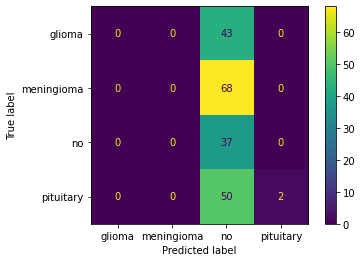

In [30]:
X_trail183D = pca.transform(X_flatten_trail)
print(X_trail183D.shape)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train183D, Y_train)

Y_pred = neigh.predict(X_trail183D)
precision = metrics.accuracy_score(Y_pred, Y_multi_trail) * 100
print("Accuracy with Not-Linear SVM considering 183PC: {0:.2f}%".format(precision))

plot_confusion_matrix(neigh, X_trail183D, Y_multi_trail)  
plt.show()